# Compare the temperature data from the UWA SBE37

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mycurrents import oceanmooring as om
import soda.dataio as io
from soda.utils.otherplot import polar_pdf

from netCDF4 import Dataset
from datetime import datetime

%matplotlib inline

In [12]:
dbfile = '../KISSME2017_Obs.db'
# Load the field site
P = io.load_sql_ncstation(dbfile, 'NP250_SBE37_CTD_1273',\
                'pressure')

T = io.load_sql_ncstation(dbfile, 'NP250_SBE37_CTD_1273',\
                'temperature')



# Clip and remove the mean
#ssh = om.from_xray(ssh[1])
#ssh.y = ssh.y-np.mean(ssh.y)

Querying database...
LOWER(Variable_Name) LIKE LOWER("pressure") and StationName LIKE "%NP250_SBE37_CTD_1273%"
/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_SBE37Data.nc NP250_SBE37_CTD_12739
/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_SBE37Data.nc NP250_SBE37_CTD_12738
Querying database...
LOWER(Variable_Name) LIKE LOWER("temperature") and StationName LIKE "%NP250_SBE37_CTD_1273%"
/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_SBE37Data.nc NP250_SBE37_CTD_12739
/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_SBE37Data.nc NP250_SBE37_CTD_12738


0
1


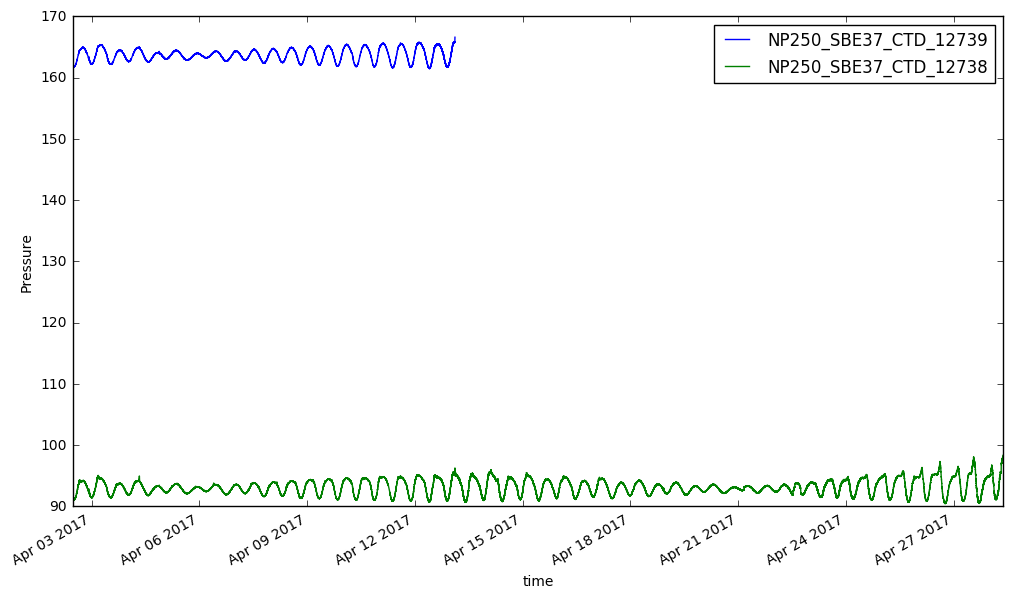

In [3]:
names = []
plt.figure(figsize=(12,7))
for ii,pp in enumerate(P):
    print ii
    pp.plot()
    names.append(pp.StationName)
plt.legend(names)

0
1


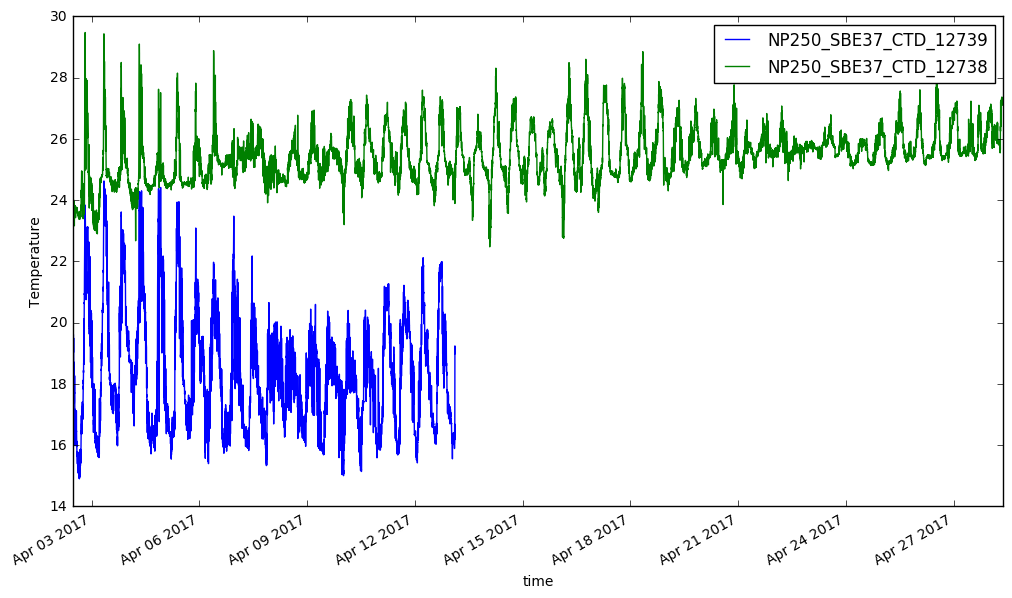

In [4]:
names = []
plt.figure(figsize=(12,7))
for ii,pp in enumerate(T):
    print ii
    pp.plot()
    names.append(pp.StationName)
plt.legend(names)

In [21]:
# Get the thermistors adjacent to each of the 37s
#
# 12739: 
#    above SBE56 7399
#    below SBE39 4456


Tup = io.load_sql_ncstation(dbfile, 'NP250_SBE56_T_7399',\
                'temperature')[0]
# Resample the 56 to make plotting viable
Tup = om.from_xray(Tup)
Tup60 = Tup.resample(60.)

#Tup = Tup[0].resample('1min','time')

Tdown = io.load_sql_ncstation(dbfile, 'NP250_SBE39_T_4456',\
                'temperature')[0]
#Tdown = Tdown.resample('1min','time')

Querying database...
LOWER(Variable_Name) LIKE LOWER("temperature") and StationName LIKE "%NP250_SBE56_T_7399%"
/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_SBE56Data.nc NP250_SBE56_T_7399


/home/suntans/code/soda/utils/timeseries.py:374: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[y.mask]=0.
/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/numpy/ma/core.py:3289: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  _data[indx] = dval
/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/numpy/ma/core.py:3290: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  _mask[indx] = mval
/home/suntans/code/soda/utils/times

Querying database...
LOWER(Variable_Name) LIKE LOWER("temperature") and StationName LIKE "%NP250_SBE39_T_4456%"
/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_SBE39Data.nc NP250_SBE39_T_4456


NP250_SBE37_CTD_12739


(14, 25)

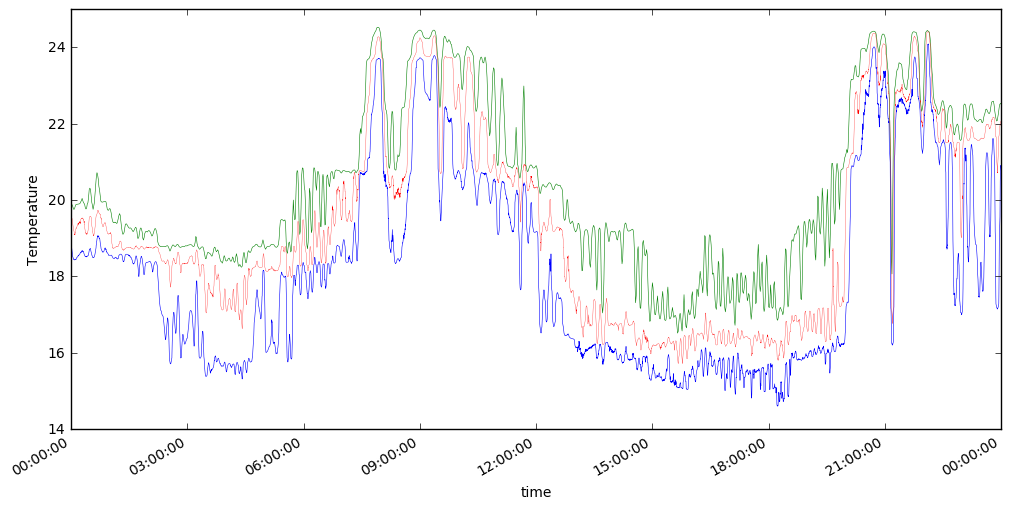

In [26]:
myT = T[0] # 12379
print myT.StationName

t1 = datetime(2017,4,4)
t2 = datetime(2017,4,5)

plt.figure(figsize=(12,6))
Tup60.plot(color='g', lw=0.4)
Tdown.plot(color='b', lw=0.4)
myT.plot(lw=0.2,color='r')
plt.xlim(t1,t2)
plt.ylim(14,25)

In [28]:
# Get the thermistors adjacent to each of the 37s
#
# 12738: 
#    above SBE56 7426
#    below SBE56 7403


Tup2 = io.load_sql_ncstation(dbfile, 'NP250_SBE56_T_7426',\
                'temperature')[0]
# Resample the 56 to make plotting viable
Tup2 = om.from_xray(Tup2)
Tup60 = Tup2.resample(60.)

Tdown2 = io.load_sql_ncstation(dbfile, 'NP250_SBE56_T_7403',\
                'temperature')[0]
# Resample the 56 to make plotting viable
Tdown2 = om.from_xray(Tdown2)
Tdown60 = Tdown2.resample(60.)

Querying database...
LOWER(Variable_Name) LIKE LOWER("temperature") and StationName LIKE "%NP250_SBE56_T_7426%"
/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_SBE56Data.nc NP250_SBE56_T_7426
Querying database...
LOWER(Variable_Name) LIKE LOWER("temperature") and StationName LIKE "%NP250_SBE56_T_7403%"
/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_SBE56Data.nc NP250_SBE56_T_7403


NP250_SBE37_CTD_12738


(22, 28)

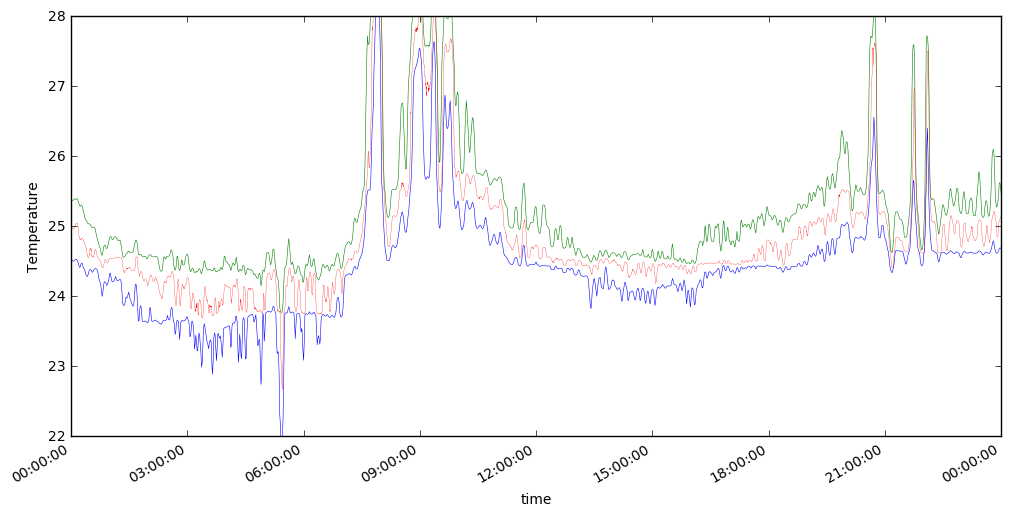

In [31]:
myT = T[1] # 12378
print myT.StationName

t1 = datetime(2017,4,4)
t2 = datetime(2017,4,5)

plt.figure(figsize=(12,6))
Tup60.plot(color='g', lw=0.4)
Tdown60.plot(color='b', lw=0.4)
myT.plot(lw=0.2,color='r')
plt.xlim(t1,t2)
plt.ylim(22,28)

In [32]:
Tall = Tup60.vstack(myT)

AttributeError: 'DataArray' object has no attribute 't'